In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import mode
import pandas as pd
import seaborn as sns
from io import StringIO
import requests
import json
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture
%matplotlib inline

In [2]:
df = pd.read_csv('Beehive Metrics Dataset/flow_2017.csv')
df.head()

,timestamp,flow
0,2017-01-01 05:15:00,0
1,2017-01-01 05:16:00,0
2,2017-01-01 05:17:00,0
3,2017-01-01 05:18:00,0
4,2017-01-01 05:19:00,0


In [3]:
#How many rows?
#Hmmm if this was consistently every minute, shouldn't there be around the same # rows as the weight .csv?
len(df.index)

1048220

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048220 entries, 0 to 1048219
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   timestamp  1048220 non-null  object
 1   flow       1048220 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 12.0+ MB


In [6]:
#Change the timestamp field to a datetime data type
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [7]:
#Print the info again to ensure the data type was changed successfully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048220 entries, 0 to 1048219
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   timestamp  1048220 non-null  datetime64[ns]
 1   flow       1048220 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 16.0 MB


In [9]:
#Show some data again to ensure that the timestamps didn't get messed up
df.head()

,timestamp,flow
0,2017-01-01 05:15:00,0
1,2017-01-01 05:16:00,0
2,2017-01-01 05:17:00,0
3,2017-01-01 05:18:00,0
4,2017-01-01 05:19:00,0


In [10]:
#Show mean, standard dev, min, max, and IQRs
df.describe()
#This doesn't seem exactly right...

,flow
count,1.048220e+06
mean,-6.880216e-01
std,3.111734e+01
min,-4.190000e+02
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,4.000000e+02


In [11]:
#Count blanks or whitespaces
df = df.replace(r'\s+\t+', np.nan, regex=True).replace('', np.nan)
#Is anything null?
df.isnull().sum()

timestamp    0
flow         0
dtype: int64

In [12]:
#None in this data set!
#df[df.isna().any(axis=1)]

In [13]:
#How many unique values?
for column in df:
    print(column, len(df[column].unique()))

timestamp 524050
flow 590


array([[<AxesSubplot:title={'center':'timestamp'}>]], dtype=object)

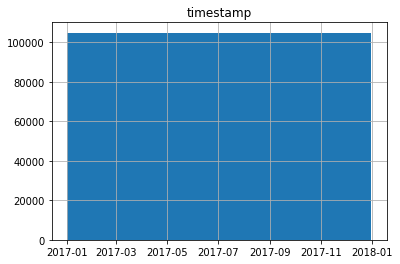

In [14]:
#Aha, so there are half as many unique timestamp values because half of the data is incoming, and half is outgoing
#Histogram of timestamps, should be even across the board
#Measured every minute
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(column='timestamp')

array([[<AxesSubplot:title={'center':'flow'}>]], dtype=object)

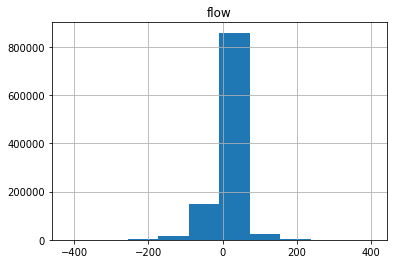

In [15]:
#And weight...
df.hist(column='flow')